In [1]:
import sys
sys.path += ["../24_01_05消息格式转换/"]
from main18_format_transform_weight import main as old_main
from main16_map_visualization2 import visualization
from main19_mph import main


查看结果

In [2]:
def show_map(map):
    N = map.N

    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            print(node.distance, end=" ")
        print()

    print("==================================")
    for i in range(N):
        for j in range(N):
            node = map.node_matrix[i][j]
            if node.best_direction == "UP":
                print("↑", end=" ")
            elif node.best_direction == "RIGHT":
                print("→", end=" ")            
            elif node.best_direction == "DOWN":
                print("↓", end=" ")            
            elif node.best_direction == "LEFT":
                print("←", end=" ")
            else:
                print("U", end=" ")
        print()

In [3]:
map_filename = "main19_mph_map.txt"

之前的方法，dijkstra+合并

manhattan_scale 1
1 16
2 16
3 16
4 16
4
2 2 4 0 1 0 0 2 0 0 3 0 0 4 0 
2 0 1 1 1 0 
4 2 1 1 2 0 
2 4 1 1 3 0 
0 2 1 1 4 0 
T1: 0; tmp_cost: 0
T2: 0; tmp_cost: 0
T3: 0; tmp_cost: 0
T4: 0; tmp_cost: 0
time score: 4.0
cost score: 12
559619.185296267


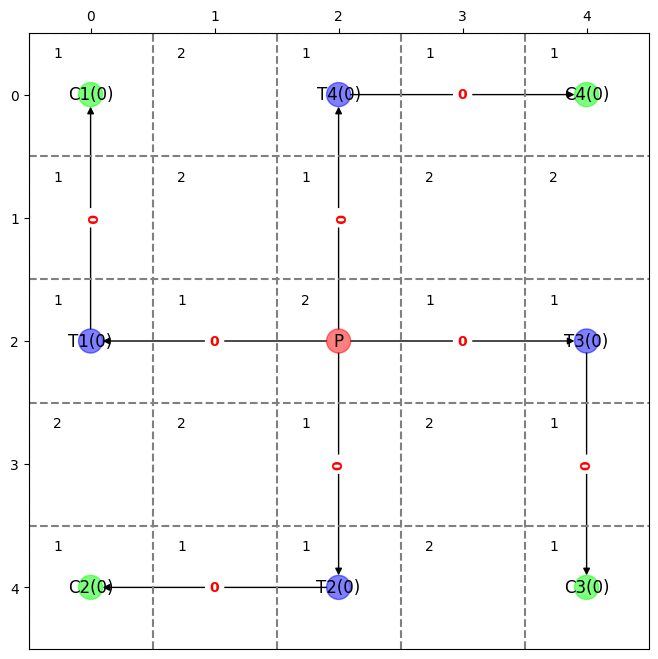

16 16 2 15 16 
15 15 1 15 16 
2 1 0 1 2 
16 15 1 15 15 
16 15 2 16 16 
↓ → ↓ ← ← 
↓ → ↓ ← ↓ 
→ → U ← ← 
↑ ↑ ↑ ↑ ↑ 
→ → ↑ ← ↑ 


In [4]:
map, provider, consumer_vector, transmitter_vector = old_main(conf_file=map_filename)
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)

新方法，MPH，最后的distance无效了，都是-1

3
2 2 3 0 1 0 0 2 0 0 3 0 
2 0 2 1 1 0 1 2 0 
0 2 1 1 4 0 
2 4 1 1 3 0 
T1: 0; tmp_cost: 0
T2: 0; tmp_cost: 0
T3: 0; tmp_cost: 0
time score: 3.75
cost score: 10
562006.1824357309


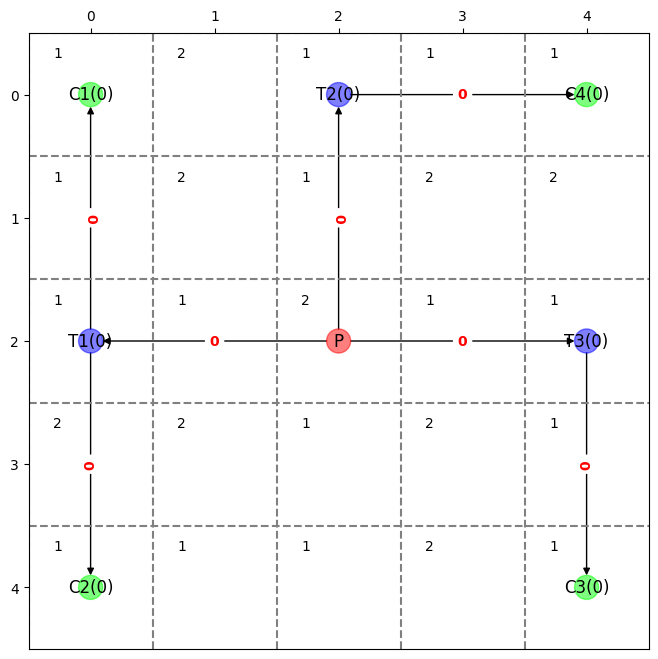

-1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 
-1 -1 -1 -1 -1 
↓ U ↓ ← ← 
↓ U ↓ U U 
→ → U ← ← 
↑ U U U ↑ 
↑ U U U ↑ 


In [5]:
map, provider, consumer_vector, transmitter_vector = main(conf_file=map_filename)
visualization(map, provider, consumer_vector, transmitter_vector)
show_map(map)